In [1]:

import pandas as pd
import matplotlib.pylab as plt
import warnings
from spacepy import pycdf
from spacepy.time import Ticktock
import os
import numpy as np
import pandas as pd
from spacepy import pycdf
from spacepy.time import Ticktock
# 完全忽略PerformanceWarning
warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)

d:\anaconda3\envs\tensorflow\lib\site-packages\spacepy\time.py:2341: UserWarning: Leapseconds may be out of date. Use spacepy.toolbox.update(leapsecs=True)
  warnings.warn('Leapseconds may be out of date.'


In [ ]:

combined_df=pd.read_hdf('combined_df_train.h5', key='df')
combined_df = combined_df[(combined_df['Time'] < '2018-01-01') | (combined_df['Time'] > '2019-01-01')]
combined_df = combined_df[(combined_df['Time'] < '2013-03-10') | (combined_df['Time'] > '2013-04-10')]
combined_df = combined_df[(combined_df['Time'] < '2015-08-25') | (combined_df['Time'] > '2015-09-25')]

In [19]:
print(combined_df)

                          Time          Flux    I         L        MLT  \
0      2012-11-14 19:04:04.417  1.752615e+04  3.0  3.477701   2.156243   
1      2012-11-14 19:07:21.250  1.743233e+04  3.0  3.582822   2.268179   
2      2012-11-14 19:07:43.121  1.163196e+04  3.0  3.594352   2.280249   
3      2012-11-14 19:07:54.057  3.269540e+04  3.0  3.600106   2.286284   
4      2012-11-14 19:17:00.881  4.182999e+06  3.0  3.878351   2.565540   
...                        ...           ...  ...       ...        ...   
532009 2017-12-31 21:58:28.720  6.091116e+05  3.0  2.531653  12.394524   
532010 2017-12-31 22:01:42.116  4.191726e+05  3.0  2.418055  12.598842   
532011 2017-12-31 22:03:29.555  1.432717e+05  3.0  2.353974  12.720962   
532012 2017-12-31 22:04:23.278  2.735720e+05  3.0  2.321682  12.784520   
532013 2017-12-31 22:12:05.284  2.560230e+04  3.0  2.037995  13.414893   

               X         Y         Z  Flux_Error  energy_kev  ... AE_150h  \
0      -0.801992  3.180938 -0.1704

In [20]:
print(combined_df.columns)

Index(['Time', 'Flux', 'I', 'L', 'MLT', 'X', 'Y', 'Z', 'Flux_Error',
       'energy_kev',
       ...
       'AE_150h', 'AL_150h', 'AU_150h', 'BZGSM_IS1_150h', 'TEMP_IS1_150h',
       'PDYN_IS1_150h', 'F107_IS1_150h', 'VX_150h', 'SYMH_150h',
       'VX_IS1_150h'],
      dtype='object', length=2412)


In [21]:
print(combined_df['Kp_1h'])

0          7
1          7
2          7
3          7
4          7
          ..
532009    13
532010    20
532011    20
532012    20
532013    20
Name: Kp_1h, Length: 513821, dtype: int64


In [23]:
#查看combined_df['Flux']除去0以外的最小值
print(combined_df[combined_df['Flux']!=0]['Flux'].min())
print(combined_df[combined_df['Flux']!=0]['Flux'].max())

452.85612229906377
283738448.1570156


In [25]:
#检查是否有缺失值
print(combined_df.isnull().sum().tolist())


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [26]:
print(combined_df.shape)

(513821, 2412)


In [27]:
print(combined_df.isnull().sum().tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [28]:
print(combined_df)

                          Time          Flux    I         L        MLT  \
0      2012-11-14 19:04:04.417  1.752615e+04  3.0  3.477701   2.156243   
1      2012-11-14 19:07:21.250  1.743233e+04  3.0  3.582822   2.268179   
2      2012-11-14 19:07:43.121  1.163196e+04  3.0  3.594352   2.280249   
3      2012-11-14 19:07:54.057  3.269540e+04  3.0  3.600106   2.286284   
4      2012-11-14 19:17:00.881  4.182999e+06  3.0  3.878351   2.565540   
...                        ...           ...  ...       ...        ...   
532009 2017-12-31 21:58:28.720  6.091116e+05  3.0  2.531653  12.394524   
532010 2017-12-31 22:01:42.116  4.191726e+05  3.0  2.418055  12.598842   
532011 2017-12-31 22:03:29.555  1.432717e+05  3.0  2.353974  12.720962   
532012 2017-12-31 22:04:23.278  2.735720e+05  3.0  2.321682  12.784520   
532013 2017-12-31 22:12:05.284  2.560230e+04  3.0  2.037995  13.414893   

               X         Y         Z  Flux_Error  energy_kev  ... AE_150h  \
0      -0.801992  3.180938 -0.1704

In [29]:
columns_list = combined_df.columns.tolist()
print(columns_list)


['Time', 'Flux', 'I', 'L', 'MLT', 'X', 'Y', 'Z', 'Flux_Error', 'energy_kev', 'datetime_hour', 'datetime_minus_h', 'BZGSM_1h', 'TEMP_1h', 'PDYN_1h', 'Kp_1h', 'Dst_1h', 'F107_1h', 'AE_1h', 'AL_1h', 'AU_1h', 'BZGSM_IS1_1h', 'TEMP_IS1_1h', 'PDYN_IS1_1h', 'F107_IS1_1h', 'VX_1h', 'SYMH_1h', 'VX_IS1_1h', 'BZGSM_2h', 'TEMP_2h', 'PDYN_2h', 'Kp_2h', 'Dst_2h', 'F107_2h', 'AE_2h', 'AL_2h', 'AU_2h', 'BZGSM_IS1_2h', 'TEMP_IS1_2h', 'PDYN_IS1_2h', 'F107_IS1_2h', 'VX_2h', 'SYMH_2h', 'VX_IS1_2h', 'BZGSM_3h', 'TEMP_3h', 'PDYN_3h', 'Kp_3h', 'Dst_3h', 'F107_3h', 'AE_3h', 'AL_3h', 'AU_3h', 'BZGSM_IS1_3h', 'TEMP_IS1_3h', 'PDYN_IS1_3h', 'F107_IS1_3h', 'VX_3h', 'SYMH_3h', 'VX_IS1_3h', 'BZGSM_4h', 'TEMP_4h', 'PDYN_4h', 'Kp_4h', 'Dst_4h', 'F107_4h', 'AE_4h', 'AL_4h', 'AU_4h', 'BZGSM_IS1_4h', 'TEMP_IS1_4h', 'PDYN_IS1_4h', 'F107_IS1_4h', 'VX_4h', 'SYMH_4h', 'VX_IS1_4h', 'BZGSM_5h', 'TEMP_5h', 'PDYN_5h', 'Kp_5h', 'Dst_5h', 'F107_5h', 'AE_5h', 'AL_5h', 'AU_5h', 'BZGSM_IS1_5h', 'TEMP_IS1_5h', 'PDYN_IS1_5h', 'F107_IS1

In [30]:
#将combined_df随机打乱
combined_df = combined_df.sample(frac=1).reset_index(drop=True)
print(combined_df)

                          Time          Flux         I         L        MLT  \
0      2014-11-21 07:02:15.848  1.504713e+06  1.587443  3.169792   4.543418   
1      2015-11-07 18:58:46.813  4.431116e+06  1.000000  5.713459  12.154450   
2      2015-01-19 18:55:28.961  1.262396e+07  1.000000  5.348225  22.298267   
3      2016-09-12 02:41:58.094  5.114935e+06  1.000000  5.851070   1.110615   
4      2016-09-14 02:01:38.099  4.928968e+06  1.000000  5.852454   2.527488   
...                        ...           ...       ...       ...        ...   
513816 2016-05-04 23:24:40.661  7.355135e+06  1.000000  6.083954   5.830596   
513817 2014-09-28 22:53:48.983  2.487994e+07  1.000000  5.148586   3.024673   
513818 2017-06-01 23:11:14.364  2.594803e+07  1.000000  5.266450  15.899251   
513819 2015-07-20 22:43:43.076  1.903075e+06  1.000000  6.274316  17.652449   
513820 2014-01-01 04:11:05.313  1.425392e+06  1.000000  6.309184  13.707812   

               X         Y         Z  Flux_Error  e

In [31]:
time_steps=120
VX_time1 = [f'VX_{i}h' for i in range(1, time_steps + 1)]
SYMH_time2 = [f'SYMH_{i}h' for i in range(1, time_steps + 1)]
VX_IS1_time3 = [f'VX_IS1_{i}h' for i in range(1, time_steps + 1)]
BZGSM_time4 = [f'BZGSM_{i}h' for i in range(1, time_steps + 1)]
TEMP_time5 = [f'TEMP_{i}h' for i in range(1, time_steps + 1)]
PDYN_time6 = [f'PDYN_{i}h' for i in range(1, time_steps + 1)]
Kp_time7 = [f'Kp_{i}h' for i in range(1, time_steps + 1)]
Dst_time8 = [f'Dst_{i}h' for i in range(1, time_steps + 1)]
F107_time9 = [f'F107_{i}h' for i in range(1, time_steps + 1)]
AE_time10 = [f'AE_{i}h' for i in range(1, time_steps + 1)]
AL_time11 = [f'AL_{i}h' for i in range(1, time_steps + 1)]
AU_time12 = [f'AU_{i}h' for i in range(1, time_steps + 1)]
BZGSM_IS1_time13 = [f'BZGSM_IS1_{i}h' for i in range(1, time_steps + 1)]
TEMP_IS1_time14 = [f'TEMP_IS1_{i}h' for i in range(1, time_steps + 1)]
PDYN_IS1_time15 = [f'PDYN_IS1_{i}h' for i in range(1, time_steps + 1)]
F107_IS1_time16 = [f'F107_IS1_{i}h' for i in range(1, time_steps + 1)]


In [32]:
print(VX_time1)

['VX_1h', 'VX_2h', 'VX_3h', 'VX_4h', 'VX_5h', 'VX_6h', 'VX_7h', 'VX_8h', 'VX_9h', 'VX_10h', 'VX_11h', 'VX_12h', 'VX_13h', 'VX_14h', 'VX_15h', 'VX_16h', 'VX_17h', 'VX_18h', 'VX_19h', 'VX_20h', 'VX_21h', 'VX_22h', 'VX_23h', 'VX_24h', 'VX_25h', 'VX_26h', 'VX_27h', 'VX_28h', 'VX_29h', 'VX_30h', 'VX_31h', 'VX_32h', 'VX_33h', 'VX_34h', 'VX_35h', 'VX_36h', 'VX_37h', 'VX_38h', 'VX_39h', 'VX_40h', 'VX_41h', 'VX_42h', 'VX_43h', 'VX_44h', 'VX_45h', 'VX_46h', 'VX_47h', 'VX_48h', 'VX_49h', 'VX_50h', 'VX_51h', 'VX_52h', 'VX_53h', 'VX_54h', 'VX_55h', 'VX_56h', 'VX_57h', 'VX_58h', 'VX_59h', 'VX_60h', 'VX_61h', 'VX_62h', 'VX_63h', 'VX_64h', 'VX_65h', 'VX_66h', 'VX_67h', 'VX_68h', 'VX_69h', 'VX_70h', 'VX_71h', 'VX_72h', 'VX_73h', 'VX_74h', 'VX_75h', 'VX_76h', 'VX_77h', 'VX_78h', 'VX_79h', 'VX_80h', 'VX_81h', 'VX_82h', 'VX_83h', 'VX_84h', 'VX_85h', 'VX_86h', 'VX_87h', 'VX_88h', 'VX_89h', 'VX_90h', 'VX_91h', 'VX_92h', 'VX_93h', 'VX_94h', 'VX_95h', 'VX_96h', 'VX_97h', 'VX_98h', 'VX_99h', 'VX_100h', 'VX_101

In [33]:
X_time1 = combined_df[VX_time1].values  
X_time2 = combined_df[SYMH_time2].values 
X_time3 = combined_df[VX_IS1_time3].values
X_time4 = combined_df[BZGSM_time4].values
X_time5 = combined_df[TEMP_time5].values
X_time6 = combined_df[PDYN_time6].values
X_time7 = combined_df[Kp_time7].values
X_time8 = combined_df[Dst_time8].values
X_time9 = combined_df[F107_time9].values
X_time10 = combined_df[AE_time10].values
X_time11 = combined_df[AL_time11].values
X_time12 = combined_df[AU_time12].values
X_time13 = combined_df[BZGSM_IS1_time13].values
X_time14 = combined_df[TEMP_IS1_time14].values
X_time15 = combined_df[PDYN_IS1_time15].values
X_time16 = combined_df[F107_IS1_time16].values


X_time = np.stack((X_time1, X_time2,X_time3,X_time4,X_time5,X_time6,X_time7,X_time8,X_time9,X_time10,X_time11,X_time12,X_time13,X_time14,X_time15,X_time16), axis=2)
print(X_time.shape)
# 定义非时间序列特征列
non_time_features = [ 'I', 'MLT',  'L']

# 提取非时间序列数据
X_non_time = combined_df[non_time_features].values  # 形状 (num_samples, 3)
y=np.log10(combined_df['Flux'].values) # 形状 (num_samples,)

# 如果是二分类任务，将其转换为二维数组
y = y.reshape(-1, 1)  # 形状 (num_samples, 1)
flux_error = combined_df['Flux_Error'].values.reshape(-1, 1)

(513821, 120, 16)


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [35]:
scaler_time = MinMaxScaler()
num_samples = X_time.shape[0]
time_steps = 120  # 根据您的数据调整
num_features = 16  # 您有16个时间序列特征
X_time_reshaped = X_time.reshape(-1, num_features)  # (num_samples * time_steps, 16)

In [36]:

X_time_scaled = scaler_time.fit_transform(X_time_reshaped)
X_time = X_time_scaled.reshape(num_samples, time_steps, num_features)
scaler_non_time = StandardScaler()
X_non_time = scaler_non_time.fit_transform(X_non_time)
scaler_target = MinMaxScaler()
y_scaled = scaler_target.fit_transform(y)


import joblib
joblib.dump(scaler_time, 'scaler_time.pkl')
joblib.dump(scaler_non_time, 'scaler_non_time.pkl')
joblib.dump(scaler_target, 'scaler_target.pkl')

scaler_flux = MinMaxScaler()
flux_error_scaled = scaler_flux.fit_transform(flux_error)  # 缩放到 [0, 1]

# 反转权重（假设较高的 Flux_Error 表示较低的质量）
flux_error_reversed = 1 - flux_error_scaled 
min_weight = 0.1
flux_error_final = flux_error_reversed * (1 - min_weight) + min_weight  # 缩放到 [min_weight, 1]

In [37]:

X_time_train, X_time_val, X_non_time_train, X_non_time_val, y_train, y_val, weight_train, weight_val = train_test_split(
    X_time, X_non_time, y_scaled, flux_error_final, test_size=0.1, random_state=42
)

In [38]:



time_series_input = Input(shape=(time_steps, num_features), name='time_series_input')
lstm_out = LSTM(64, activation='tanh')(time_series_input)
print(lstm_out.shape)

# 非时间序列输入：3个特征
non_time_series_input = Input(shape=(X_non_time_train.shape[1],), name='non_time_series_input')

# 拼接 LSTM 输出和非时间序列输入
concatenated = Concatenate()([lstm_out, non_time_series_input])

# 全连接层
dense1 = Dense(64, activation='sigmoid')(concatenated)
dense2 = Dense(32, activation='sigmoid')(dense1)
output = Dense(1, activation='linear')(dense2)  # 根据任务调整输出层

# 构建模型
model = Model(inputs=[time_series_input, non_time_series_input], outputs=output)

# from tensorflow.keras.optimizers import Adam
# optimizer = Adam(learning_rate=0.001, clipvalue=1.0)

# 编译模型
model.compile(optimizer='adam',
              loss='mean_squared_error',  # 根据任务调整损失函数
              metrics=['mae'])

# 模型概述
model.summary()






(None, 64)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 time_series_input (InputLayer)  [(None, 120, 16)]   0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 64)           20736       ['time_series_input[0][0]']      
                                                                                                  
 non_time_series_input (InputLa  [(None, 3)]         0           []                               
 yer)                                                                                             
                                                                                                  
 concatenate (Concatenate)      (None, 67)           0           ['lstm[0][0]',    

In [39]:
import tensorflow as tf
import gc

# 清理 keras 的 session
tf.keras.backend.clear_session()

# 强制进行垃圾回收
gc.collect()

3439

In [40]:
history = model.fit(
    [X_time_train, X_non_time_train],  # 输入
    y_train,
    epochs=150,  # 设置较大的 epoch，早停会提前终止
    batch_size=128,
    validation_data=([X_time_val, X_non_time_val], y_val),
    sample_weight=weight_train.flatten()
)

Epoch 1/150
3613/3613 [==============================] - 23s 6ms/step - loss: 0.0029 - mae: 0.0546 - val_loss: 0.0041 - val_mae: 0.0407
Epoch 2/150
3613/3613 [==============================] - 21s 6ms/step - loss: 0.0015 - mae: 0.0379 - val_loss: 0.0030 - val_mae: 0.0355
Epoch 3/150
3613/3613 [==============================] - 22s 6ms/step - loss: 0.0012 - mae: 0.0336 - val_loss: 0.0028 - val_mae: 0.0312
Epoch 4/150
3613/3613 [==============================] - 22s 6ms/step - loss: 0.0010 - mae: 0.0312 - val_loss: 0.0025 - val_mae: 0.0301
Epoch 5/150
3613/3613 [==============================] - 21s 6ms/step - loss: 9.4285e-04 - mae: 0.0297 - val_loss: 0.0021 - val_mae: 0.0288
Epoch 6/150
3613/3613 [==============================] - 22s 6ms/step - loss: 8.8170e-04 - mae: 0.0286 - val_loss: 0.0023 - val_mae: 0.0285
Epoch 7/150
3613/3613 [==============================] - 22s 6ms/step - loss: 8.4078e-04 - mae: 0.0278 - val_loss: 0.0020 - val_mae: 0.0277
Epoch 8/150
3613/3613 [=============

In [41]:
#保存scaler_time
import joblib
joblib.dump(scaler_time, 'scaler_time.pkl')
joblib.dump(scaler_non_time, 'scaler_non_time.pkl')
joblib.dump(scaler_target, 'scaler_target.pkl')


['scaler_target.pkl']

In [42]:
# y_pred_scaled = model.predict([X_time_val, X_non_time_val])

# # 反缩放预测结果
# y_pred = scaler_target.inverse_transform(y_pred_scaled)
# y_val_original = scaler_target.inverse_transform(y_val)

In [43]:
# from sklearn.metrics import mean_squared_error, r2_score
# rmse = np.sqrt(mean_squared_error(y_val_original, y_pred))
# r2 = r2_score(y_val_original, y_pred)
# print(f'测试集上的 RMSE: {rmse}',f'测试集上的 R2: {r2}')


# # 15. 可视化训练过程
# import matplotlib.pyplot as plt

# # 绘制训练和验证的损失
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['loss'], label='训练损失')
# plt.plot(history.history['val_loss'], label='验证损失')
# plt.legend()
# plt.xlabel('Epoch')
# plt.ylabel('Loss (MSE)')
# plt.title('Training and Validation Loss')

# # 绘制训练和验证的 MAE
# plt.subplot(1, 2, 2)
# plt.plot(history.history['mae'], label='训练 MAE')
# plt.plot(history.history['val_mae'], label='验证 MAE')
# plt.legend()
# plt.xlabel('Epoch')
# plt.ylabel('MAE')
# plt.title('Training and Validation MAE')

# plt.show()

In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [45]:
#保存模型

model.save('LSTM_148_model.h5')
#读取模型
#model = keras.models.load_model('LOW2_model.h5')

1606/1606 [==============================] - 4s 2ms/step
测试集上的 RMSE: 0.14002820465498406 测试集上的 R2: 0.950165278091719


d:\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


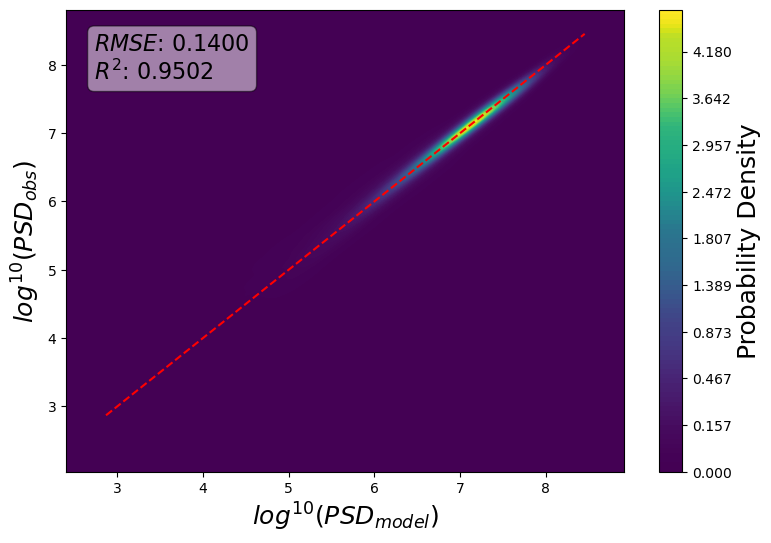

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# 显示负号
plt.rcParams['axes.unicode_minus'] = False


y_pred_scaled = model.predict([X_time_val, X_non_time_val])

# 反缩放预测结果
y_pred = scaler_target.inverse_transform(y_pred_scaled)
y_test_subset = scaler_target.inverse_transform(y_val)



y_test_exp = y_test_subset.flatten()
y_pred_exp = y_pred.flatten()



# 计算均方根误差（RMSE）
rmse = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
r2 = r2_score(y_test_subset, y_pred)
print(f'测试集上的 RMSE: {rmse}',f'测试集上的 R2: {r2}')




# 创建绘图
plt.figure(figsize=(9, 6))

# 使用 Seaborn 的 kdeplot 绘制联合概率密度图
ax = sns.kdeplot(
    x=y_test_exp, 
    y=y_pred_exp, 
    cmap='viridis', 
    fill=True, 
    thresh=0, 
    levels=100,
    bw_adjust=1.5
)

# 添加理想拟合线
plt.plot(
    [y_test_exp.min(), y_test_exp.max()], 
    [y_test_exp.min(), y_test_exp.max()], 
    'r--', 
    label='理想拟合线'
)

# 提取绘图的颜色集合（PolyCollection）
collections = ax.collections

if collections:
    # 创建颜色条，基于第一个集合（KDE 图）
    cbar = plt.colorbar(collections[0], ax=ax)
    cbar.set_label('Probability Density',fontsize=18)

ax.text(
    0.05, 0.95, 
    f'$RMSE$: {rmse:.4f}\n$R^2$: {r2:.4f}', 
    transform=ax.transAxes,
    fontsize=16,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.5)
)
# plt.xlim(-8, -4)
# plt.ylim(-8, -4)
# # 添加图例
# plt.legend()

# 设置坐标轴标签和标题
plt.xlabel('$log^{10}(PSD_{model})$',fontsize=18)
plt.ylabel('$log^{10}(PSD_{obs})$',fontsize=18)
# plt.title('真实值与预测值的概率密度图')

# 显示图形
plt.show()

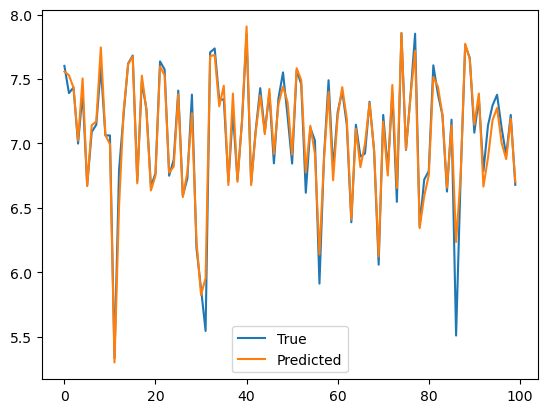

In [48]:
plt.plot(y_test_exp[:100], label='True')
plt.plot(y_pred_exp[:100], label='Predicted')
plt.legend()